<a href="https://colab.research.google.com/github/Avifah22/Insurance-Cross-Sell-XGBoost/blob/main/Proyek2_Insurance_Cross_Sell_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Proyek/train.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
# Cek tipe data dan nilai null
print(df.info())

# Cek ringkasan statistik untuk kolom angka (Premi, Umur, dll)
display(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
# Ubah Gender & Damage (Binary)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

# Ubah Vehicle Age (Ordinal - ada urutannya)
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Year': 2})

print("Data setelah diconvert:")
display(df.head())


Data setelah diconvert:


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,NaN,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1.0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,NaN,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0.0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0.0,0,27496.0,152.0,39,0


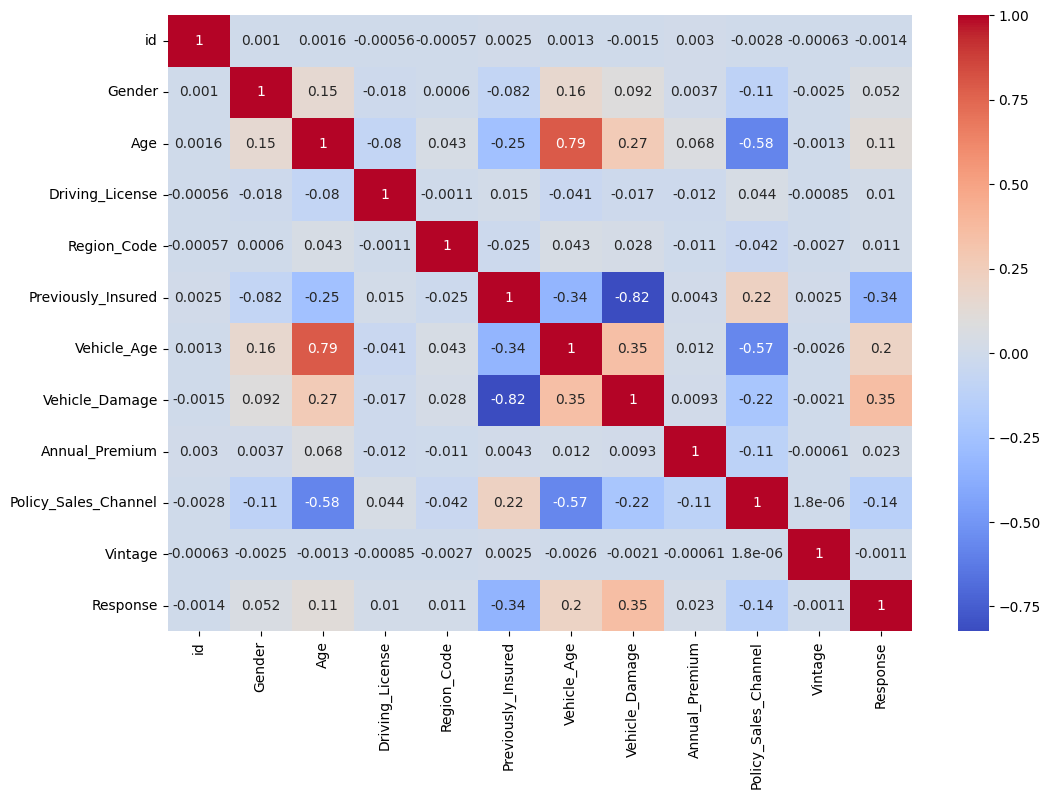

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi antar kolom
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

# 1. Hapus kolom 'id'
# 2. Pisahkan Features (X) dan Target (y)
X = df.drop(['id', 'Response'], axis=1)
y = df['Response']

# 3. Split data: 80% buat belajar, 20% buat ujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah data latihan: {len(X_train)} baris")
print(f"Jumlah data ujian: {len(X_test)} baris")


Jumlah data latihan: 304887 baris
Jumlah data ujian: 76222 baris


In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


In [9]:
# Hitung perbandingan untuk menyeimbangkan data
# Formula: jumlah_negatif / jumlah_positif
ratio = (y_train == 0).sum() / (y_train == 1).sum()

# Inisialisasi Model
model_xgb = XGBClassifier(
    n_estimators=100,      # Jumlah pohon (estafet)
    learning_rate=0.1,     # Kecepatan belajar
    max_depth=6,           # Kedalaman pohon
    scale_pos_weight=ratio,# Penyeimbang data (!)
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Proses Training
model_xgb.fit(X_train, y_train)

print("Proses belajar selesai!")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [01:10:25] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Proses belajar selesai!


In [10]:
# Prediksi data ujian
y_pred = model_xgb.predict(X_test)
y_prob = model_xgb.predict_proba(X_test)[:, 1] # Ambil probabilitas untuk AUC

# Cetak Laporan
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     66880
           1       0.29      0.92      0.44      9342

    accuracy                           0.71     76222
   macro avg       0.64      0.80      0.62     76222
weighted avg       0.90      0.71      0.76     76222

ROC-AUC Score: 0.8579


In [11]:
# Buat DataFrame baru untuk hasil
hasil_akhir = X_test.copy()

# Masukkan kunci jawaban asli buat perbandingan
hasil_akhir['Jawaban_Asli'] = y_test

# Masukkan tebakan model (y_pred)
hasil_akhir['Prediksi_Model'] = y_pred

# Masukkan skor probabilitas
# Ambil kolom kedua [:, 1] yang artinya peluang "Tertarik"
hasil_akhir['Skor_Tertarik'] = y_prob

# Urutkan dari yang skornya paling tinggi (prioritas telepon)
hasil_akhir = hasil_akhir.sort_values(by='Skor_Tertarik', ascending=False)

display(hasil_akhir.head(10))


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Jawaban_Asli,Prediksi_Model,Skor_Tertarik
173520,1,49,1,6.0,0,0.0,1,38407.0,26.0,96,0,1,0.914589
25821,1,55,1,29.0,0,0.0,1,35926.0,26.0,295,1,1,0.903716
180725,0,59,1,28.0,0,0.0,1,50261.0,26.0,252,0,1,0.898846
79757,0,50,1,46.0,0,0.0,1,42460.0,26.0,295,1,1,0.898391
190319,1,37,1,41.0,0,0.0,1,39046.0,124.0,252,1,1,0.897113
38735,0,34,1,3.0,0,1.0,1,22795.0,163.0,158,0,1,0.894710
31312,1,30,1,3.0,0,1.0,1,30843.0,163.0,143,0,1,0.894092
57590,1,31,1,28.0,0,0.0,1,33197.0,124.0,11,0,1,0.890801
275579,1,36,1,3.0,0,1.0,1,27787.0,163.0,254,1,1,0.890366
99105,1,32,1,41.0,0,1.0,1,23462.0,163.0,241,1,1,0.889776


In [12]:
from google.colab import files

# Simpan ke file CSV di sistem Colab
nama_file = 'Daftar_Prospek_Asuransi.csv'
hasil_akhir.to_csv(nama_file, index=False)

# Perintah untuk download otomatis
files.download(nama_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# Melihat rata-rata Response (minat beli) berdasarkan Umur Kendaraan
print(df.groupby('Vehicle_Age')['Response'].mean().sort_values(ascending=False))


Vehicle_Age
1.0    0.173755
0.0    0.043705
Name: Response, dtype: float64


/tmp/ipython-input-1386365461.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle_Age', y='Response', data=df, palette='viridis')


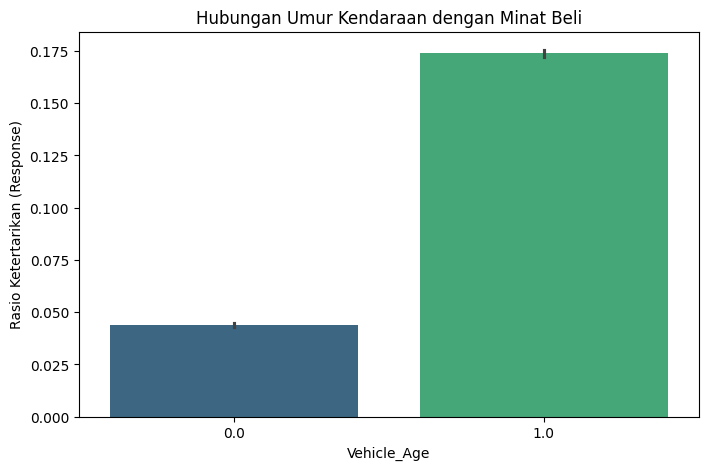

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x='Vehicle_Age', y='Response', data=df, palette='viridis')
plt.title('Hubungan Umur Kendaraan dengan Minat Beli')
plt.ylabel('Rasio Ketertarikan (Response)')
plt.show()


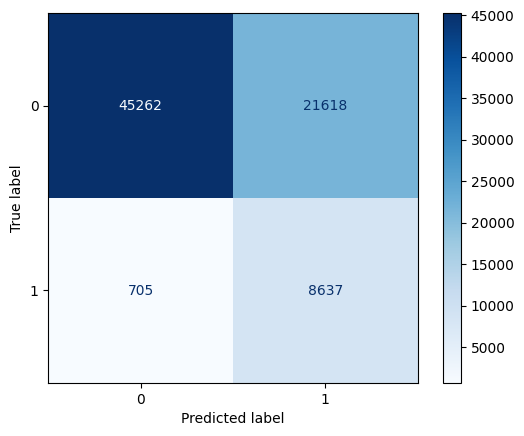

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

# Menampilkan tabel "Tebakan vs Kenyataan"
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test, cmap='Blues')
plt.show()
# Kiri Atas: Orang yang aslinya 0, dan ditebak 0 (Benar).
#Kanan Bawah: Orang yang aslinya 1, dan ditebak 1 (Benar).
#Kanan Atas & Kiri Bawah: Model salah tebak (Error).
